In [ ]:
import pandas as pd
import sqlalchemy as sq

schools_en = pd.read_csv("School_Enrolment_Data_604.csv")
schools_en.head(5)


In [28]:
schools_en = schools_en.rename(columns={
    'School Year': 'School_Year',
    'School Authority Category': 'School_Authority_Category',
    'School Name': 'School_Name',
    'ECS': 'ECS',
    'Grade 1': 'Grade_1',
    'Grade 2': 'Grade_2',
    'Grade 3': 'Grade_3',
    'Grade 4': 'Grade_4',
    'Grade 5': 'Grade_5',
    'Grade 6': 'Grade_6',
    'Grade 7': 'Grade_7',
    'Grade 8': 'Grade_8',
    'Grade 9': 'Grade_9',
    'Grade 10': 'Grade_10',
    'Grade 11': 'Grade_11',
    'Grade 12': 'Grade_12',
    'Total': 'Total'
})
schools_en
##Columns renamed for SQL readability 

,School_Year,School_Authority_Category,School_Name,ECS,Grade_1,Grade_2,Grade_3,Grade_4,Grade_5,Grade_6,Grade_7,Grade_8,Grade_9,Grade_10,Grade_11,Grade_12,Total
0,2020-2021,Public,Midnapore School,35.0,77.0,64.0,72.0,57.0,36.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,374
1,2020-2021,Public,Alternative High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,29.0,50.0,88
2,2020-2021,Public,James Fowler High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.0,234.0,315.0,839
3,2020-2021,Public,Arbour Lake Middle School,NaN,NaN,NaN,NaN,NaN,126.0,107.0,166.0,162.0,171.0,NaN,NaN,NaN,732
4,2020-2021,Public,Erin Woods School,31.0,56.0,59.0,68.0,50.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,2020-2021,Separate,St. Albert the Great,32.0,39.0,31.0,36.0,35.0,48.0,40.0,81.0,70.0,81.0,NaN,NaN,NaN,493
398,2020-2021,Public,Lord Beaverbrook High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,482.0,251.0,293.0,1026
399,2020-2021,Public,Belvedere Parkway School,41.0,62.0,61.0,63.0,71.0,53.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,414
400,2020-2021,Public,Somerset School,34.0,37.0,44.0,57.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206


In [29]:
# Database connection details
user = 'l01-10'
password = 'BhZC3ULTKA9MA'
host = 'datasciencedb.ucalgary.ca'
database = 'l01-10'

# Connect to the database
engine = sq.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.format(user, password, host, database))

# Write the DataFrame into a table
schools_en.to_sql(name='schools_en', con=engine, if_exists='replace')

# Read from the database table as a DataFrame
df_schools = pd.read_sql_table("schools_en", engine)
print(df_schools.head())

   index School_Year School_Authority_Category                School_Name  \
0      0   2020-2021                    Public           Midnapore School   
1      1   2020-2021                    Public    Alternative High School   
2      2   2020-2021                    Public   James Fowler High School   
3      3   2020-2021                    Public  Arbour Lake Middle School   
4      4   2020-2021                    Public          Erin Woods School   

    ECS  Grade_1  Grade_2  Grade_3  Grade_4  Grade_5  Grade_6  Grade_7  \
0  35.0     77.0     64.0     72.0     57.0     36.0     33.0      NaN   
1   NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2   NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3   NaN      NaN      NaN      NaN      NaN    126.0    107.0    166.0   
4  31.0     56.0     59.0     68.0     50.0     71.0      NaN      NaN   

   Grade_8  Grade_9  Grade_10  Grade_11  Grade_12  Total  
0      NaN      NaN       NaN    

In [30]:
school_loc = pd.read_csv("Schools.csv")
school_loc.head(3)

school_loc = school_loc.rename(columns={
     'BOARD': 'Board',
    'NAME': 'School_Name',
    'ADDRESS_AB': 'Address_AB',
    'POSTAL_COD': 'Postal_Code',
    'CITY': 'City',
    'PROVINCE': 'Province',
    'PHONE_NO': 'Phone_No',
    'FAX_NO': 'Fax_No',
    'EMAIL': 'Email',
    'GRADES': 'Grades',
    'POSTSECOND': 'Postsecond',
    'DATA_SOURCE': 'Data_Source',
    'ELEM': 'Elem',
    'JUNIOR_H': 'Junior_H',
    'SENIOR_H': 'Senior_H',
    'GLOBAL_ID': 'Global_ID',
    'POINT': 'Point',
    
})
school_loc

,Board,School_Name,Address_AB,Postal_Code,City,Province,Phone_No,Fax_No,Email,Grades,Postsecond,Data_Source,Elem,Junior_H,Senior_H,Global_ID,Point
0,The Calgary School Division,David Thompson School,9320 Arbour Cres SE,T2J1K4,Calgary,AB,(403) 777-7470,NaN,davidthompson@cbe.ab.ca,Elementary/Junior High,N,N,Y,Y,N,{A56C0215-3848-4863-A4D3-DC36327159B9},POINT (-114.0546514 50.9694036)
1,Connect Charter School Society,Connect Charter School,5915 Lewis Drive S.W.,T3E5Z4,Calgary,AB,(403) 282-2890,NaN,office@connectcharter.ca,Elementary/Junior High,N,N,Y,Y,N,{F57CF224-BFE6-4C79-A201-C4F8A3800F04},POINT (-114.1357584 51.0003735)
2,The Calgary Roman Catholic Separate School Div...,Prince of Peace School,43 Auburn Meadows Blvd SE,T3M2C9,Calgary,AB,(403) 500-2125,NaN,princeofpeace@cssd.ab.ca,Elementary/Junior High,N,N,Y,Y,N,{12C8ED21-0BFA-45A7-80F2-85D719166E3D},POINT (-113.9498421 50.8932639)
3,The Calgary School Division,Colonel Walker School,1921 9 Ave SE,T2G0V3,Calgary,AB,(403) 777-6780,NaN,colonelwalker@cbe.ab.ca,Elementary,N,N,Y,N,N,{D617F8E8-158B-471D-9254-9F099FE43573},POINT (-114.0190347 51.034362)
4,The Calgary School Division,Alternative High School,5003 20 St SW,T2T5A5,Calgary,AB,(403) 777-7730,NaN,alternative@cbe.ab.ca,Senior High,N,N,N,N,Y,{779B7375-BF66-47C8-930D-5678241C9570},POINT (-114.10996 51.0096595)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,The Calgary School Division,Penbrooke Meadows School,5645 Pensacola Cres SE,T2A2G4,Calgary,AB,(403) 777-8230,NaN,penbrookemeadows@cbe.ab.ca,Elementary,N,N,Y,N,N,{C7539706-ABAB-4017-8FFE-6CFD64F0BE58},POINT (-113.9521888 51.0417953)
485,Congregation House of Jacob-Mikveh Israel,Akiva Academy,140 Haddon Road S.W.,T2V2Y3,Calgary,AB,(403) 258-1312,NaN,office@akiva.ca,Elementary/Junior High,N,N,Y,Y,N,{762FC253-E6D2-4593-9D03-C664C2E97360},POINT (-114.0778236 50.9732774)
486,The Calgary Roman Catholic Separate School Div...,Madeleine D' Houet Bilingual School,108 - 22 Street N.W.,T2N2M8,Calgary,AB,(403) 500-2008,NaN,madeleinedhouet@cssd.ab.ca,Junior High,N,N,N,Y,N,{92E7FB5A-CB2F-4BF7-BF3F-82383737EFF8},POINT (-114.1122383 51.0531936)
487,The Calgary School Division,Connaught School,1121 12 Ave SW,T2R0J8,Calgary,AB,(403) 777-8560,NaN,connaught@cbe.ab.ca,Elementary,N,N,Y,N,N,{6452A69B-4C82-42FB-9384-7B5BD7B285E0},POINT (-114.0877162 51.0415327)


In [31]:
school_loc = school_loc.drop(['Phone_No', 'Fax_No', 'Email', 'Global_ID', 'Point'], axis=1)
school_loc

,Board,School_Name,Address_AB,Postal_Code,City,Province,Grades,Postsecond,Data_Source,Elem,Junior_H,Senior_H
0,The Calgary School Division,David Thompson School,9320 Arbour Cres SE,T2J1K4,Calgary,AB,Elementary/Junior High,N,N,Y,Y,N
1,Connect Charter School Society,Connect Charter School,5915 Lewis Drive S.W.,T3E5Z4,Calgary,AB,Elementary/Junior High,N,N,Y,Y,N
2,The Calgary Roman Catholic Separate School Div...,Prince of Peace School,43 Auburn Meadows Blvd SE,T3M2C9,Calgary,AB,Elementary/Junior High,N,N,Y,Y,N
3,The Calgary School Division,Colonel Walker School,1921 9 Ave SE,T2G0V3,Calgary,AB,Elementary,N,N,Y,N,N
4,The Calgary School Division,Alternative High School,5003 20 St SW,T2T5A5,Calgary,AB,Senior High,N,N,N,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
484,The Calgary School Division,Penbrooke Meadows School,5645 Pensacola Cres SE,T2A2G4,Calgary,AB,Elementary,N,N,Y,N,N
485,Congregation House of Jacob-Mikveh Israel,Akiva Academy,140 Haddon Road S.W.,T2V2Y3,Calgary,AB,Elementary/Junior High,N,N,Y,Y,N
486,The Calgary Roman Catholic Separate School Div...,Madeleine D' Houet Bilingual School,108 - 22 Street N.W.,T2N2M8,Calgary,AB,Junior High,N,N,N,Y,N
487,The Calgary School Division,Connaught School,1121 12 Ave SW,T2R0J8,Calgary,AB,Elementary,N,N,Y,N,N


In [32]:
school_loc['Address_AB'] = school_loc['Address_AB'].str.replace('.', '')
school_loc

,Board,School_Name,Address_AB,Postal_Code,City,Province,Grades,Postsecond,Data_Source,Elem,Junior_H,Senior_H
0,The Calgary School Division,David Thompson School,9320 Arbour Cres SE,T2J1K4,Calgary,AB,Elementary/Junior High,N,N,Y,Y,N
1,Connect Charter School Society,Connect Charter School,5915 Lewis Drive SW,T3E5Z4,Calgary,AB,Elementary/Junior High,N,N,Y,Y,N
2,The Calgary Roman Catholic Separate School Div...,Prince of Peace School,43 Auburn Meadows Blvd SE,T3M2C9,Calgary,AB,Elementary/Junior High,N,N,Y,Y,N
3,The Calgary School Division,Colonel Walker School,1921 9 Ave SE,T2G0V3,Calgary,AB,Elementary,N,N,Y,N,N
4,The Calgary School Division,Alternative High School,5003 20 St SW,T2T5A5,Calgary,AB,Senior High,N,N,N,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
484,The Calgary School Division,Penbrooke Meadows School,5645 Pensacola Cres SE,T2A2G4,Calgary,AB,Elementary,N,N,Y,N,N
485,Congregation House of Jacob-Mikveh Israel,Akiva Academy,140 Haddon Road SW,T2V2Y3,Calgary,AB,Elementary/Junior High,N,N,Y,Y,N
486,The Calgary Roman Catholic Separate School Div...,Madeleine D' Houet Bilingual School,108 - 22 Street NW,T2N2M8,Calgary,AB,Junior High,N,N,N,Y,N
487,The Calgary School Division,Connaught School,1121 12 Ave SW,T2R0J8,Calgary,AB,Elementary,N,N,Y,N,N


In [33]:
school_loc['Section'] = school_loc['Address_AB'].str.slice(start=-2)
school_loc

,Board,School_Name,Address_AB,Postal_Code,City,Province,Grades,Postsecond,Data_Source,Elem,Junior_H,Senior_H,Section
0,The Calgary School Division,David Thompson School,9320 Arbour Cres SE,T2J1K4,Calgary,AB,Elementary/Junior High,N,N,Y,Y,N,SE
1,Connect Charter School Society,Connect Charter School,5915 Lewis Drive SW,T3E5Z4,Calgary,AB,Elementary/Junior High,N,N,Y,Y,N,SW
2,The Calgary Roman Catholic Separate School Div...,Prince of Peace School,43 Auburn Meadows Blvd SE,T3M2C9,Calgary,AB,Elementary/Junior High,N,N,Y,Y,N,SE
3,The Calgary School Division,Colonel Walker School,1921 9 Ave SE,T2G0V3,Calgary,AB,Elementary,N,N,Y,N,N,SE
4,The Calgary School Division,Alternative High School,5003 20 St SW,T2T5A5,Calgary,AB,Senior High,N,N,N,N,Y,SW
...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,The Calgary School Division,Penbrooke Meadows School,5645 Pensacola Cres SE,T2A2G4,Calgary,AB,Elementary,N,N,Y,N,N,SE
485,Congregation House of Jacob-Mikveh Israel,Akiva Academy,140 Haddon Road SW,T2V2Y3,Calgary,AB,Elementary/Junior High,N,N,Y,Y,N,SW
486,The Calgary Roman Catholic Separate School Div...,Madeleine D' Houet Bilingual School,108 - 22 Street NW,T2N2M8,Calgary,AB,Junior High,N,N,N,Y,N,NW
487,The Calgary School Division,Connaught School,1121 12 Ave SW,T2R0J8,Calgary,AB,Elementary,N,N,Y,N,N,SW


In [34]:
# Database connection details
user = 'l01-10'
password = 'BhZC3ULTKA9MA'
host = 'datasciencedb.ucalgary.ca'
database = 'l01-10'

# Connect to the database
engine = sq.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.format(user, password, host, database))

# Write the DataFrame into a table
school_loc.to_sql(name='school_loc', con=engine, if_exists='replace')

# Read from the database table as a DataFrame
df_school_loc = pd.read_sql_table("school_loc", engine)
print(df_school_loc.head())

   index                                              Board  \
0      0                        The Calgary School Division   
1      1                     Connect Charter School Society   
2      2  The Calgary Roman Catholic Separate School Div...   
3      3                        The Calgary School Division   
4      4                        The Calgary School Division   

               School_Name                 Address_AB Postal_Code     City  \
0    David Thompson School        9320 Arbour Cres SE      T2J1K4  Calgary   
1   Connect Charter School        5915 Lewis Drive SW      T3E5Z4  Calgary   
2   Prince of Peace School  43 Auburn Meadows Blvd SE      T3M2C9  Calgary   
3    Colonel Walker School             1921  9 Ave SE      T2G0V3  Calgary   
4  Alternative High School             5003  20 St SW      T2T5A5  Calgary   

  Province                  Grades Postsecond Data_Source Elem Junior_H  \
0       AB  Elementary/Junior High          N           N    Y        Y   
1 

In [ ]:
school_en2 = '''
SELECT se.School_Name, sl.Address_AB, sl.Section, Grade_1, Grade_2, Grade_3, Grade_4, Grade_5, Grade_6, Grade_7, Grade_8, Grade_9, Grade_10, Grade_11, Grade_12
FROM schools_en se
JOIN school_loc sl ON se.School_Name = sl.School_Name;

'''
school_en2 = pd.read_sql_query(school_en2, engine)
school_en2.to_sql('school_en2', con=engine, index=False, if_exists='replace')
school_en2

In [10]:
# Read from the database table as a DataFrame
crime_analysis = pd.read_sql_table("crime_analysis", engine)
(crime_analysis.head(10))

,index,Section,CommunityName,Category,2020
0,0,NE,ABBEYDALE,Assault (Non-domestic),15.0
1,1,NE,ABBEYDALE,Commercial Robbery,0.0
2,2,NE,ABBEYDALE,Street Robbery,1.0
3,3,NE,ABBEYDALE,Violence 'Other' (Non-domestic),15.0
4,4,NE,ABBEYDALE,Break & Enter - Dwelling,4.0
5,5,NE,ABBEYDALE,Break & Enter - Commercial,1.0
6,6,NE,ABBEYDALE,Break & Enter - Other Premises,8.0
7,7,NE,ABBEYDALE,Theft OF Vehicle,27.0
8,8,NE,ABBEYDALE,Theft FROM Vehicle,35.0
9,9,NE,ABBEYDALE,Disorder,380.0


In [ ]:
import pandas as pd

# Assuming you have an active database connection named 'engine'

query_crime = '''
SELECT crime_analysis.section, SUM(crime_analysis.`2020`) AS total_count 
FROM crime_analysis
WHERE crime_analysis.section IN ('NE', 'SW') 
GROUP BY crime_analysis.section;

'''

# Executing the SQL query and reading results into a DataFrame
query_crime_df = pd.read_sql_query(query_crime, engine)

# Displaying the DataFrame
print(query_crime_df)


In [ ]:
query_grade_10 = '''
SELECT SUM(Grade_10) AS Total_Enrollments_Grade_10_SW
FROM school_en2
WHERE Section = 'SW';
'''

query_grade_11 = '''
SELECT SUM(Grade_11) AS Total_Enrollments_Grade_11_SW
FROM school_en2
WHERE Section = 'SW';
'''

query_grade_12 = '''
SELECT SUM(Grade_12) AS Total_Enrollments_Grade_12_SW
FROM school_en2
WHERE Section = 'SW';
'''

query_crime_SW = '''
SELECT crime_analysis.section, SUM(crime_analysis.`2020`) AS total_count 
FROM crime_analysis
WHERE crime_analysis.section IN ('SW') 
GROUP BY crime_analysis.section;

'''

# Executing the SQL query and reading results into a DataFrame
query_crime_df = pd.read_sql_query(query_crime_SW, engine)

# Displaying the DataFrame
print("\nTotal Crime in SW Section:\n", query_crime_df)


result_df_grade_10 = pd.read_sql_query(query_grade_10, engine)
result_df_grade_11 = pd.read_sql_query(query_grade_11, engine)
result_df_grade_12 = pd.read_sql_query(query_grade_12, engine)

print("Total Enrollments in Grade 10 (SW Section):\n", result_df_grade_10)
print("\nTotal Enrollments in Grade 11 (SW Section):\n", result_df_grade_11)
print("\nTotal Enrollments in Grade 12 (SW Section):\n", result_df_grade_12)





In [13]:
# Total Crime in SW Section
total_crime_SW = 24752.0

# Total Enrollments in Grade 10 (SW Section)
total_enrollment_grade_10_SW = 3577.0

# Total Enrollments in Grade 11 (SW Section)
total_enrollment_grade_11_SW = 3514.0

# Total Enrollments in Grade 12 (SW Section)
total_enrollment_grade_12_SW = 4451.0

# Ratio of Grade 10 Enrollment to Total Crime in SW Section
ratio_grade_10_SW = total_enrollment_grade_10_SW / total_crime_SW

# Ratio of Grade 11 Enrollment to Total Crime in SW Section
ratio_grade_11_SW = total_enrollment_grade_11_SW / total_crime_SW

# Ratio of Grade 12 Enrollment to Total Crime in SW Section
ratio_grade_12_SW = total_enrollment_grade_12_SW / total_crime_SW

print("Ratio of Grade 10 Enrollment to Total Crime in SW Section:", ratio_grade_10_SW)
print("Ratio of Grade 11 Enrollment to Total Crime in SW Section:", ratio_grade_11_SW)
print("Ratio of Grade 12 Enrollment to Total Crime in SW Section:", ratio_grade_12_SW)


Ratio of Grade 10 Enrollment to Total Crime in SW Section: 0.14451357466063347
Ratio of Grade 11 Enrollment to Total Crime in SW Section: 0.1419683257918552
Ratio of Grade 12 Enrollment to Total Crime in SW Section: 0.17982385261797026


In [ ]:
query_grade_10 = '''
SELECT SUM(Grade_10) AS Total_Enrollments_Grade_10_NE
FROM school_en2
WHERE Section = 'NE';
'''

query_grade_11 = '''
SELECT SUM(Grade_11) AS Total_Enrollments_Grade_11_NE
FROM school_en2
WHERE Section = 'NE';
'''

query_grade_12 = '''
SELECT SUM(Grade_12) AS Total_Enrollments_Grade_12_NE
FROM school_en2
WHERE Section = 'NE';
'''

query_crime_NE = '''
SELECT crime_analysis.section, SUM(crime_analysis.`2020`) AS total_count 
FROM crime_analysis
WHERE crime_analysis.section IN ('NE') 
GROUP BY crime_analysis.section;

'''

# Executing the SQL query and reading results into a DataFrame
query_crime_N = pd.read_sql_query(query_crime_NE, engine)

# Displaying the DataFrame
print("\nTotal Crime in NE Section:\n", query_crime_N)


result_df_grade_10 = pd.read_sql_query(query_grade_10, engine)
result_df_grade_11 = pd.read_sql_query(query_grade_11, engine)
result_df_grade_12 = pd.read_sql_query(query_grade_12, engine)

print("Total Enrollments in Grade 10 (NE Section):\n", result_df_grade_10)
print("\nTotal Enrollments in Grade 11 (NE Section):\n", result_df_grade_11)
print("\nTotal Enrollments in Grade 12 (NE Section):\n", result_df_grade_12)


ratio_grade_10 = result_df_grade_10['Total_Enrollments_Grade_10_NE']/query_crime_N
print(ratio_grade_10)


In [15]:
# Total Crime in NE Section
total_crime_NE = 28821.0

# Total Enrollments in Grade 10 (NE Section)
total_enrollment_grade_10_NE = 2267.0

# Total Enrollments in Grade 11 (NE Section)
total_enrollment_grade_11_NE = 2057.0

# Total Enrollments in Grade 12 (NE Section)
total_enrollment_grade_12_NE = 2101.0

# Ratio of Grade 10 Enrollment to Total Crime in NE Section
ratio_grade_10_NE = total_enrollment_grade_10_NE / total_crime_NE

# Ratio of Grade 11 Enrollment to Total Crime in NE Section
ratio_grade_11_NE = total_enrollment_grade_11_NE / total_crime_NE

# Ratio of Grade 12 Enrollment to Total Crime in NE Section
ratio_grade_12_NE = total_enrollment_grade_12_NE / total_crime_NE

print("Ratio of Grade 10 Enrollment to Total Crime in NE Section:", ratio_grade_10_NE)
print("Ratio of Grade 11 Enrollment to Total Crime in NE Section:", ratio_grade_11_NE)
print("Ratio of Grade 12 Enrollment to Total Crime in NE Section:", ratio_grade_12_NE)



Ratio of Grade 10 Enrollment to Total Crime in NE Section: 0.07865792304222616
Ratio of Grade 11 Enrollment to Total Crime in NE Section: 0.07137156934179938
Ratio of Grade 12 Enrollment to Total Crime in NE Section: 0.07289823392665071


In [16]:
# Total Crime in SW Section
total_crime_SW = 24752.0

# Total Enrollments in Grade 10 (SW Section)
total_enrollment_grade_10_SW = 3577.0

# Total Enrollments in Grade 11 (SW Section)
total_enrollment_grade_11_SW = 3514.0

# Total Enrollments in Grade 12 (SW Section)
total_enrollment_grade_12_SW = 4451.0

# Ratio of Grade 10 Enrollment to Total Crime in SW Section
ratio_grade_10_SW = total_enrollment_grade_10_SW / total_crime_SW

# Ratio of Grade 11 Enrollment to Total Crime in SW Section
ratio_grade_11_SW = total_enrollment_grade_11_SW / total_crime_SW

# Ratio of Grade 12 Enrollment to Total Crime in SW Section
ratio_grade_12_SW = total_enrollment_grade_12_SW / total_crime_SW

print("Ratio of Grade 10 Enrollment to Total Crime in SW Section:", ratio_grade_10_SW)
print("Ratio of Grade 11 Enrollment to Total Crime in SW Section:", ratio_grade_11_SW)
print("Ratio of Grade 12 Enrollment to Total Crime in SW Section:", ratio_grade_12_SW)

# Total Crime in NE Section
total_crime_NE = 28821.0

# Total Enrollments in Grade 10 (NE Section)
total_enrollment_grade_10_NE = 2267.0

# Total Enrollments in Grade 11 (NE Section)
total_enrollment_grade_11_NE = 2057.0

# Total Enrollments in Grade 12 (NE Section)
total_enrollment_grade_12_NE = 2101.0

# Ratio of Grade 10 Enrollment to Total Crime in NE Section
ratio_grade_10_NE = total_enrollment_grade_10_NE / total_crime_NE

# Ratio of Grade 11 Enrollment to Total Crime in NE Section
ratio_grade_11_NE = total_enrollment_grade_11_NE / total_crime_NE

# Ratio of Grade 12 Enrollment to Total Crime in NE Section
ratio_grade_12_NE = total_enrollment_grade_12_NE / total_crime_NE

print("Ratio of Grade 10 Enrollment to Total Crime in NE Section:", ratio_grade_10_NE)
print("Ratio of Grade 11 Enrollment to Total Crime in NE Section:", ratio_grade_11_NE)
print("Ratio of Grade 12 Enrollment to Total Crime in NE Section:", ratio_grade_12_NE)

Ratio of Grade 10 Enrollment to Total Crime in SW Section: 0.14451357466063347
Ratio of Grade 11 Enrollment to Total Crime in SW Section: 0.1419683257918552
Ratio of Grade 12 Enrollment to Total Crime in SW Section: 0.17982385261797026
Ratio of Grade 10 Enrollment to Total Crime in NE Section: 0.07865792304222616
Ratio of Grade 11 Enrollment to Total Crime in NE Section: 0.07137156934179938
Ratio of Grade 12 Enrollment to Total Crime in NE Section: 0.07289823392665071


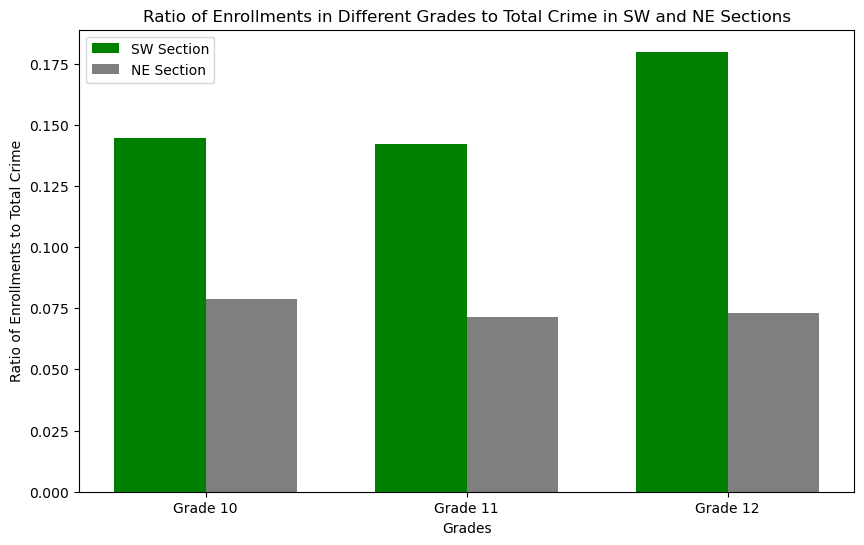

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Data
grades = ['Grade 10', 'Grade 11', 'Grade 12']
num_grades = len(grades)

# Ratios for SW Section
ratios_grade_10_SW = ratio_grade_10_SW
ratios_grade_11_SW = ratio_grade_11_SW
ratios_grade_12_SW = ratio_grade_12_SW
ratios_SW = [ratios_grade_10_SW, ratios_grade_11_SW, ratios_grade_12_SW]

# Ratios for NE Section
ratios_grade_10_NE = ratio_grade_10_NE
ratios_grade_11_NE = ratio_grade_11_NE
ratios_grade_12_NE = ratio_grade_12_NE
ratios_NE = [ratios_grade_10_NE, ratios_grade_11_NE, ratios_grade_12_NE]

# Width of each bar
bar_width = 0.35

# Position of bars on x-axis
x_SW = np.arange(num_grades)
x_NE = [x + bar_width for x in x_SW]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x_SW, ratios_SW, color='green', width=bar_width, label='SW Section')
plt.bar(x_NE, ratios_NE, color='black', width=bar_width, label='NE Section', alpha=0.5)

# Add labels and title
plt.xlabel('Grades')
plt.ylabel('Ratio of Enrollments to Total Crime')
plt.title('Ratio of Enrollments in Different Grades to Total Crime in SW and NE Sections')
plt.xticks([x + bar_width/2 for x in range(num_grades)], grades)
plt.legend()

# Show plot
plt.show()


Based on the provided data, when analyzing the ratio of enrollment data across grades 10-12 over total crime in each area (SW and NE), we observed that the SW section exhibited higher ratios compared to the NE section. This suggests that, in the SW section, there are relatively more students enrolled per grade in schools compared to the number of reported crimes.

A higher ratio indicates that for each reported crime, there are relatively more students enrolled per grade in schools in that area. This could imply that there is a larger student population in Grade 10, 11, and 12 in the SW section compared to the number of reported crimes, indicating potentially better safety in terms of the student-to-crime ratio.


In [ ]:
query_ratios = '''
SELECT 
    'NE' AS Section,
    SUM(s.Grade_10 + s.Grade_11 + s.Grade_12) AS Total_Enrollments,
    SUM(CASE WHEN s.Section = 'NE' THEN c.2020 ELSE 0 END) AS Total_Crime,
    SUM(s.Grade_10 + s.Grade_11 + s.Grade_12) / NULLIF(SUM(CASE WHEN s.Section = 'NE' THEN c.2020 ELSE 0 END), 0) AS Enrollment_to_Crime_Ratio
FROM 
    school_en2 AS s
JOIN 
    crime_analysis AS c ON s.Section = c.Section
WHERE 
    s.Section = 'NE'
    AND (s.Grade_10 IS NOT NULL OR s.Grade_11 IS NOT NULL OR s.Grade_12 IS NOT NULL)
'''

# Execute the query and read the result into a DataFrame
result = pd.read_sql_query(query_ratios, engine)
print(result)